<a href="https://colab.research.google.com/github/SantanuOjha/MachineLearning/blob/main/Heart_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heart Disease Prediction

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

!wget https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv

--2025-08-05 15:29:06--  https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [text/plain]
Saving to: ‘heart.csv.2’

heart.csv.2         100%[===================>]  11.06K  --.-KB/s    in 0s      

2025-08-05 15:29:06 (52.1 MB/s) - ‘heart.csv.2’ saved [11328/11328]



In [22]:
df = pd.read_csv('heart.csv')
df.columns = [
    "Age" , "Sex" , "ChestPainType" , "RestingBloodPressure" , "SerumCholesterol" ,
    "FastingBloodSugar" , "RestingECG" , "MaxHeartRate" , "ExerciseInducedAngina" , "STDepression" ,
    "Slope" , "NumMajorVessels" , "Thalassemia" , "Target"
]

display(df.head())

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,STDepression,Slope,NumMajorVessels,Thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Sex                    303 non-null    int64  
 2   ChestPainType          303 non-null    int64  
 3   RestingBloodPressure   303 non-null    int64  
 4   SerumCholesterol       303 non-null    int64  
 5   FastingBloodSugar      303 non-null    int64  
 6   RestingECG             303 non-null    int64  
 7   MaxHeartRate           303 non-null    int64  
 8   ExerciseInducedAngina  303 non-null    int64  
 9   STDepression           303 non-null    float64
 10  Slope                  303 non-null    int64  
 11  NumMajorVessels        303 non-null    int64  
 12  Thalassemia            303 non-null    int64  
 13  Target                 303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,STDepression,Slope,NumMajorVessels,Thalassemia,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBloodPressure,0
SerumCholesterol,0
FastingBloodSugar,0
RestingECG,0
MaxHeartRate,0
ExerciseInducedAngina,0
STDepression,0


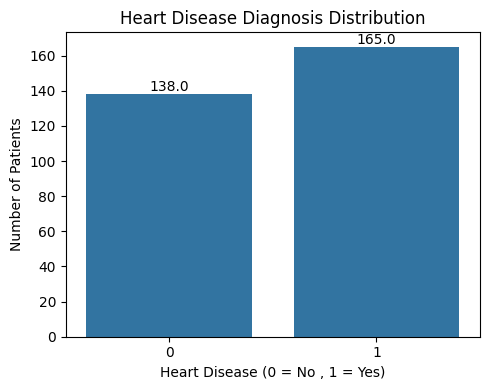

In [25]:
plt.figure(figsize=(5, 4))
ax = sns.countplot(x= "Target" , data = df)
plt.title("Heart Disease Diagnosis Distribution")
plt.xlabel("Heart Disease (0 = No , 1 = Yes)")
plt.ylabel("Number of Patients")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha = 'center', va = 'bottom')
plt.tight_layout()
plt.show()

In [27]:
x=df.drop("Target" , axis = 1)

y=df["Target"]

In [28]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [29]:
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [30]:
model = LogisticRegression()
model.fit(x_train_scaled , y_train)

y_pred = model.predict(x_test_scaled)
y_prob = model.predict_proba(x_test_scaled)[:, 1]

Accuracy Score 0.8524590163934426

Classification Report               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


Roc_Auc Score 0.9267241379310345


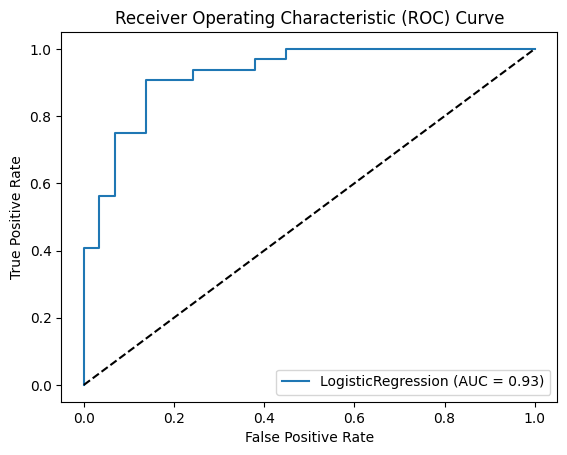

In [31]:
print("Accuracy Score" , accuracy_score(y_test , y_pred))
print("\nClassification Report" , classification_report(y_test , y_pred))

#Roc_Auc Score
roc_auc = roc_auc_score(y_test , y_prob)
print("\nRoc_Auc Score" , roc_auc)

fpr , tpr , thresholds = roc_curve(y_test , y_prob)
plt.plot(fpr , tpr , label = 'LogisticRegression (AUC = {:.2f})'.format(roc_auc))
plt.plot([0 , 1] , [0 , 1] , 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
